In [1]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [4]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    print(result.shape)
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [5]:
# df = npy2df('data/posterior/bkup/gene_Atf4.npy')
# df = npy2df('data/posterior/gene_2.npy')
df = npy2df('data/matlab/gene_2_from_matlab.npy')

df

(1000, 5, 1)


,kon,ron,koff,roff,mu,delta,dist
0,0.798234,0.295033,3.691889,0.111486,85.231085,1,0.000296
1,0.915454,0.234994,8.948223,0.140231,57.060670,1,0.113429
2,10.304022,1.594645,3.823169,0.074054,230.524952,1,0.029646
3,4.178345,3.206117,13.687012,0.141301,140.537355,1,0.025558
4,11.548626,1.394775,6.193000,0.099384,449.708199,1,0.004539
...,...,...,...,...,...,...,...
4995,0.353580,0.224251,3.703770,0.220545,68.260407,1,0.259202
4996,1.362699,0.815828,3.845103,0.091759,81.464645,1,0.012939
4997,10.304022,1.594645,3.823169,0.074054,230.524952,1,0.029646
4998,8.198938,1.228466,6.060745,0.119011,452.761460,1,0.018031


In [6]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [7]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,0.798234,0.295033,3.691889,0.111486,85.231085,1,0.000296,2.705578,33.115196,0.027917,2822.444093
1,0.915454,0.234994,8.948223,0.140231,57.060670,1,0.113429,3.895643,63.810645,0.014770,3641.078187
2,10.304022,1.594645,3.823169,0.074054,230.524952,1,0.029646,6.461639,51.626759,0.017215,11901.256248
3,4.178345,3.206117,13.687012,0.141301,140.537355,1,0.025558,1.303242,96.864457,0.010187,13613.074568
4,11.548626,1.394775,6.193000,0.099384,449.708199,1,0.004539,8.279920,62.313651,0.014166,28022.959692
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.353580,0.224251,3.703770,0.220545,68.260407,1,0.259202,1.576715,16.793736,0.054435,1146.347248
4996,1.362699,0.815828,3.845103,0.091759,81.464645,1,0.012939,1.670327,41.904263,0.022949,3413.715908
4997,10.304022,1.594645,3.823169,0.074054,230.524952,1,0.029646,6.461639,51.626759,0.017215,11901.256248
4998,8.198938,1.228466,6.060745,0.119011,452.761460,1,0.018031,6.674124,50.925975,0.017361,23057.318923


In [8]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [9]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [10]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde=False):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [11]:
best_parameters(df)

3816

In [12]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf):
    """
    
    """
    
    index_max_parameter = best_parameters(df, save_kde="density_kernel")

    xmax = df[bs][index_max_parameter]
    ymax = df[bf][index_max_parameter]

    fig = sns.scatterplot(data=df, x=bf, y=bs, hue="density_kernel",
               palette="viridis", s=1)
    fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    plt.show()

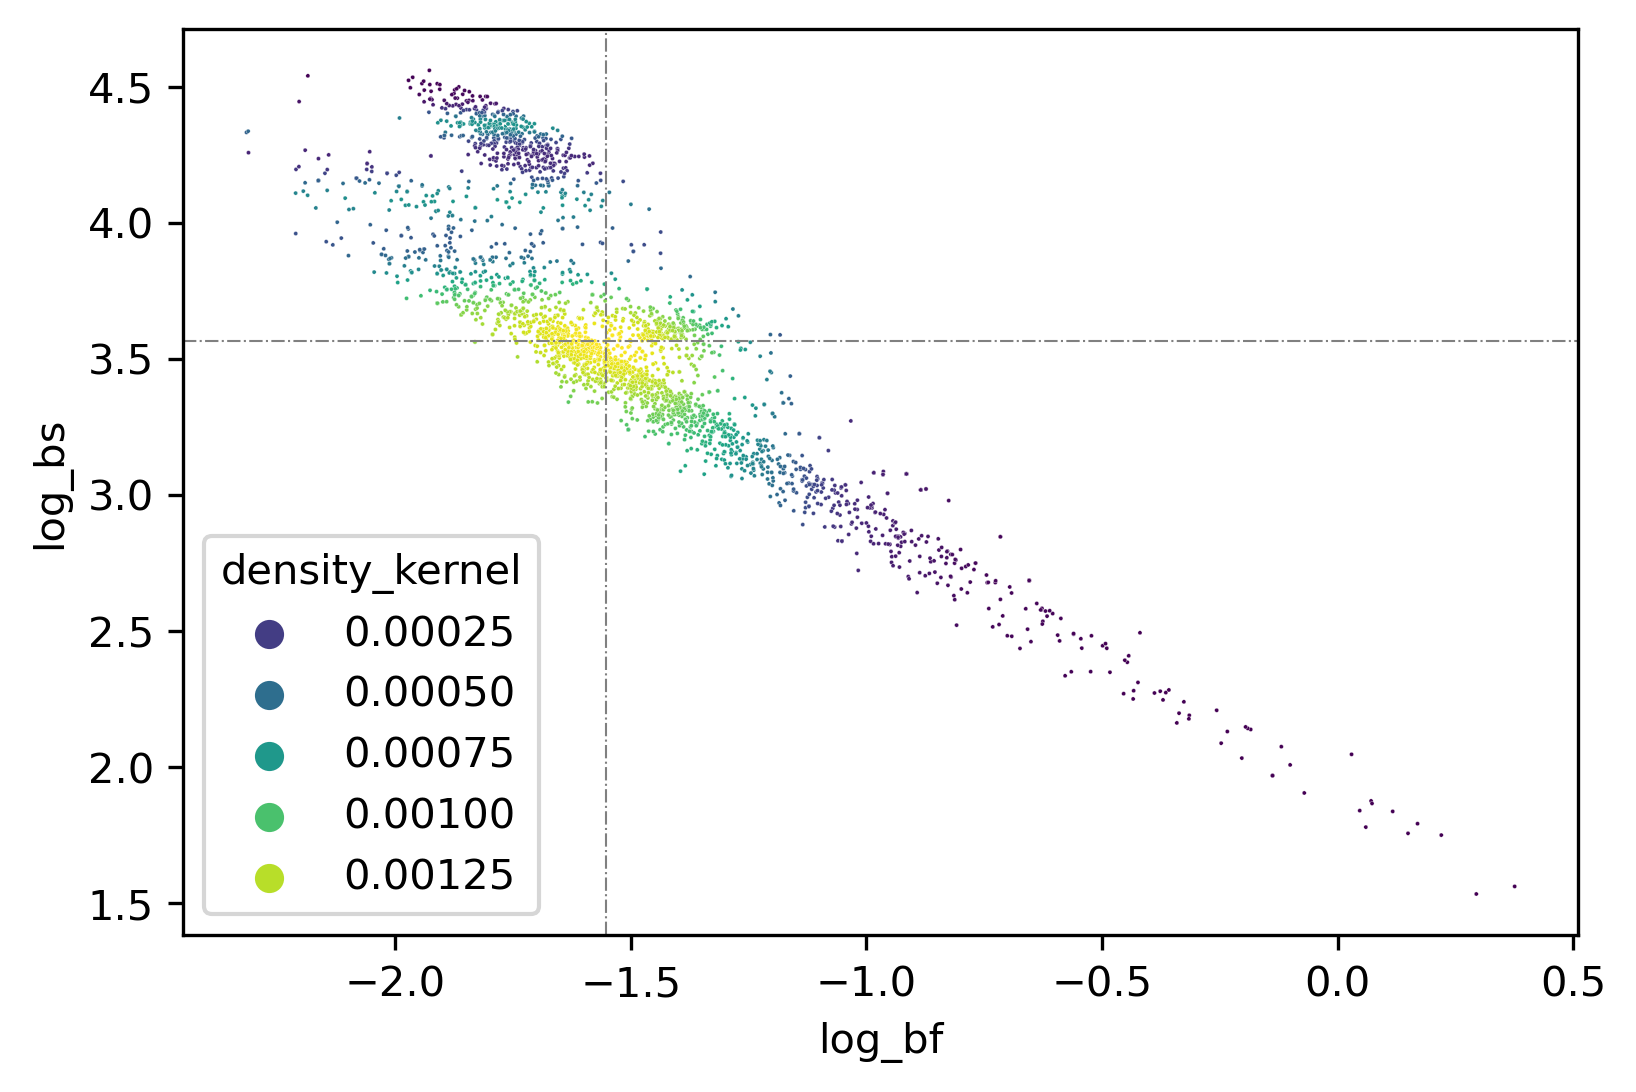

In [13]:
plot_kde(df, bs="log_bs", bf="log_bf")